# Pandas and Visualization

pandas is a library that is indended to make data analysis easier.

The central concept in pandas is a "dataframe". These dataframes are similar (in many respects) to Excel spreadsheets. They are typically 2-dimensional representations of data.

The first thing that we need to do is to import pandas. By convention, we rename it to "pd".

We're also importing another visualization library called seaborn. Again, by convention it's imported as "sns"

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

## Getting the data

For now, we are assuming that you have data from somewhere else, in a [CSV file](https://en.wikipedia.org/wiki/Comma-separated_values). For today's exercises, we're going to use data that I got from [BigQuery](https://console.cloud.google.com/bigquery), which is a tool produced by Google for querying huge datasets.

The folks at [Pushshift](https://pushshift.io/) gather and publish a bunch of the data from reddit. I queried their data to get a random set of 100K comments from 2018. You can download that data [here](https://github.com/jdfoote/Intro-to-Programming-and-Data-Science/blob/master/resources/100k_random_reddit_2018.csv).

First, we load it into a dataframe. Change the path to where you are storing your data.

In [44]:
reddit_df = pd.read_csv('../resources/100k_random_reddit_2018.csv')

The "head" method lets us look at the first few rows of the data

In [45]:
reddit_df.head()

,created_utc,subreddit,author,comment_length,score
0,1514764841,Astronomy,illuminatiisnowhere,50,3
1,1514764972,politics,ExtracurricularSpork,31,10
2,1514765017,frugalmalefashion,TheBarnhouseEffect,126,5
3,1514765217,KansasCityChiefs,thenewguyreddit,48,5
4,1514765360,Aeon,ribnag,385,1


As you can see, this is organized a lot like a spreadsheet or a CSV file. Each row is an observation, and each column is a measure about that observation. In this case, a row represents a comment on reddit.

We are going to be talking a lot more about how to manipulate and work with this data. This document is intended to introduce a few key ideas.

## Selecting data

The first is selecting data - getting a subset of the data.

This is a really confusing thing about pandas and takes some getting used to. There is a detailed explanation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) but I'm going to try to give a gentler introduction here.

The main thing that trips people up is remembering that dataframes have an "index". By default, this is a number that refers to each row in the dataframe. If you look at our dataframe, you will see that on the far left is an unnamed column of numbers starting at 0. This is the index.

It is assigned in the order that the rows were in the CSV file. However, it can change if we reorder things.

For example, this code will sort the dataframe by comment length. Notice how the index numbers are now out of order.

In [46]:
df_by_length = reddit_df.sort_values('comment_length', ascending=False)
df_by_length.head()

,created_utc,subreddit,author,comment_length,score
21207,1522288057,LoveNikki,queerestqueen,10045,6
52329,1532344433,Music,DJ_Spam,9726,1
78315,1540314439,NewsBrasil,newsbrasilbot,9720,1
61600,1535240874,NFLstream4kHD,Illustrious_Play,9577,1
71908,1538405283,Music,DJ_Spam,9418,2


We can use this "out of order" version of the data fram to show the difference between the two main ways of selecting data: `iloc` and `loc`.

`iloc` selects data like a list index, based on the location in the current dataframe. The syntax is just like selecting elements from two lists the row list and the column list. If we use slice notation it looks like this:

`dataframe_name.iloc[starting_row:ending_row,staring_column:ending_column]`

You can also select a list of rows or columns. Below, I pass a list of columns to select.

In [49]:
# This code gets the first 14 rows and columns 1, 3, and 4
df_by_length.iloc[0:15,[1,3,4]]

,subreddit,comment_length,score
21207,LoveNikki,10045,6
52329,Music,9726,1
78315,NewsBrasil,9720,1
61600,NFLstream4kHD,9577,1
71908,Music,9418,2
33033,FortNiteBR,9345,8
91701,conspiracy,9187,1
13795,The_Mueller,9134,18
98385,kol,9100,5
44483,copypasta,8969,1


The `loc` syntax, on the other hand, selects based on labels. It selects rows based on index labels and columns based on column names. When something is sorted, this can have unintended consequences. For example, we might think that this would just select the rows with an index from 0 to 3, but it selects everything in between them, as currently sorted. Notice at the bottom of the output, it says that the length is 1,494!

In [65]:
df_by_length.loc[0:3, 'comment_length']

0        50
4910     50
46574    50
46678    50
56224    50
         ..
61453    48
62063    48
25059    48
955      48
3        48
Name: comment_length, Length: 1494, dtype: int64

## Boolean indexing

Instead, if we wanted to get the first 15 rows, we'd need to do something like this, which uses "boolean indexing" to filter to only the rows where the index is less than or equal to 15.

In [66]:
df_by_length.loc[df_by_length.index <= 15,"comment_length":]

,comment_length,score
13,1189,3
4,385,1
14,198,2
15,168,1
2,126,5
12,101,0
10,78,12
9,64,8
11,60,2
0,50,3


### Exercise

Sorth the data frame by score and select the rows with the 10th to 20th highest scores.


In [9]:
## Your code here

Now, how would you select just the `subreddit` and `comment_length` columns for the rows you selected above?

In [10]:
## Your code here

There are also a few other ways to select parts of a dataframe. One that's useful is dot notation - as long as your column names don't have spaces, you can do something like:

In [11]:
df_by_length.comment_length

11853    9599
26091    8274
48008    8200
25182    7309
35697    7148
         ... 
12080       1
16213       1
42313       1
18549       1
18006       1
Name: comment_length, Length: 49790, dtype: int64

## Grouping and aggregating

Pandas is also great for grouping and aggregating data.

We're going to talk a lot more about analyzing data but here's a quick introduciton to some great built in functions like max, sum, and mean

In [12]:
# Get the mean score and comment length

df_by_length.loc[:,"comment_length":"score"].mean()

comment_length    152.373308
score               7.863226
dtype: float64

We also might want to create subreddit-level or person-level measures. To do this, we'll want to "group" the data.

The groupby function will create a "grouped" dataframe, where aggregations apply to the group rather than the whole dataframe.

For example, this will tell use the average comment score by subreddit:

In [13]:
# Note that I'm using the original dataframe but either one would work

# Groups by subreddit, then gets the score column
# Then gets the mean of that column, then sorts it by the value of the column
reddit_df.groupby('subreddit').score.mean().sort_values() 

subreddit
Residency          -33.000000
libtard            -22.000000
undelete           -19.000000
techtheatre        -19.000000
standupshots       -17.000000
                      ...    
polandball         170.285714
SkincareAddicts    200.000000
ChoosingBeggars    206.884615
comedygenocide     286.000000
SuperMegaShow      334.000000
Name: score, Length: 8187, dtype: float64

As another example, this will get the number of comments per person:

In [14]:
reddit_df.groupby('author').size().sort_values()

author
-------------------7       1
desecate                   1
desertodysseysteve         1
desertsapper               1
designerspit               1
                        ... 
transcribot               34
Edgar_The_Pug_Bot         50
KeepingDankMemesDank      70
AutoModerator            648
[deleted]               4866
Length: 42316, dtype: int64

### Exercise

Find the average (mean) comment length for each subreddit and sort by comment length

In [15]:
## Your code here

We can talk more about this in class, but this creates a user-based dataframe with data for the number of subreddits, number of comments, and average score for each user.

In [16]:
grouped_df = reddit_df.groupby('author')

subreddit_count = grouped_df.subreddit.nunique()
comments_count = grouped_df.size()
comments_mean = grouped_df.score.mean()


person_df = pd.DataFrame({'subreddit_count': subreddit_count,
                          'comments_count': comments_count,
                          'comments_mean': comments_mean})

In [17]:
person_df.head()

,subreddit_count,comments_count,comments_mean
author,,,
-------------------7,1,1,1.0
-----_------_---,1,2,6.5
---TheFierceDeity---,1,1,2.0
---YNWA---,1,1,0.0
---pewpew,1,1,5.0


# Visualizations

Python has a powerful (and complicated) plotting library called matplotlib. If you want to do more complicated plots, I highly recommend learning how to use it. For now, I'm going to introduce the visualizations that are part of pandas, and later introduce some which are part of Seaborn. Both of these are based on matplotlib but make it easier and simpler to use.

I'm introducing a few basic visualizations here. You should [read and reference this page](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#pie-plot) to learn about a bunch more options.

### Scatterplots

I think it would be interesting to know if there's a relationship between the length of comments and the score. This plot shows the scatterplot of that relationship.

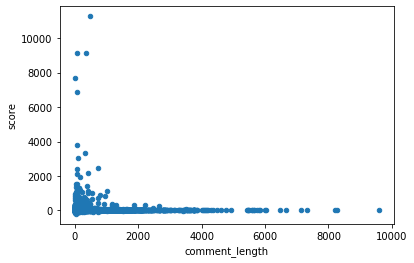

In [28]:
reddit_df.plot.scatter(x = 'comment_length', y = 'score')

Both of these measures are really skewed, so let's try plotting them on log scales instead.

In [35]:
reddit_df['comment_logged'] = np.log(reddit_df.comment_length)
# Scores can be negative, so we add the minimum (plus one) to make sure they are positive
# And then log transform
reddit_df['score_logged'] = np.log(reddit_df.score + abs(reddit_df.score.min()) + 1)

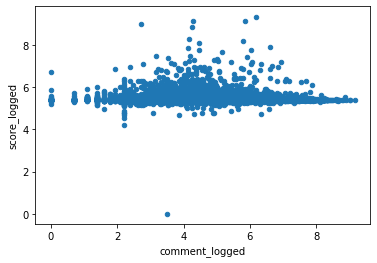

In [36]:
reddit_df.plot.scatter(x = 'comment_logged', y = 'score_logged')

Not much of a relationship there.

### Exercise

Plot the number of comments and average score. Are frequent posters more likely to share comments that are well-received?

*Hint*: You will want to use a dataframe that groups the data by person

In [38]:
## Your code here

## Time Series

The last thing I want to show is how to do time series (because they are confusing!)

They key thing to remember is that the plots assume that time is the index of the data frame. So, the first thing we need to do is to convert it to the index.

`reddit_df.index` is where the index is stored, so the following code takes the `created_utc` column--which is the [Unix time](https://en.wikipedia.org/wiki/Unix_time) that each comment was posted--and converts it to a "DateTime", which is a way of representing a date and time in Python. It then stores the datetime in the index.

In [70]:
reddit_df.index = pd.to_datetime(reddit_df.created_utc, unit='s', utc=True)
reddit_df.head()

,created_utc,subreddit,author,comment_length,score
created_utc,,,,,
2018-01-01 00:00:41+00:00,1514764841,Astronomy,illuminatiisnowhere,50,3
2018-01-01 00:02:52+00:00,1514764972,politics,ExtracurricularSpork,31,10
2018-01-01 00:03:37+00:00,1514765017,frugalmalefashion,TheBarnhouseEffect,126,5
2018-01-01 00:06:57+00:00,1514765217,KansasCityChiefs,thenewguyreddit,48,5
2018-01-01 00:09:20+00:00,1514765360,Aeon,ribnag,385,1


In order to make a time series, we have to combine the data. The `resample` function does this. Below, we combine it by hour to see daily trends.

In [73]:
hourly_comments = reddit_df.resample('H').apply({'author':'count'})

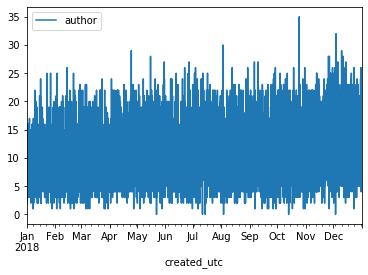

In [74]:
hourly_comments.plot()

This is too messy, so let's zoom in on just a few weeks, using boolean indexing

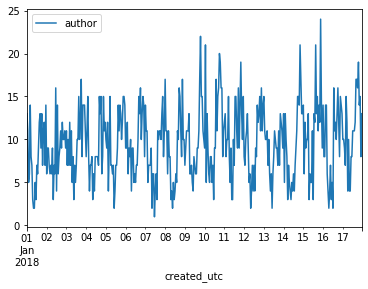

In [77]:
hourly_comments.loc[hourly_comments.index < '2018-01-18',:].plot()

### Exercise

Plot the number of comments per month over the year.

In [ ]:
# Your code here

Finally, if we wanted to summarize by hour, we could group the posting time by hour. Below, we see that about 8:00 UTC (which is about 3:00 AM Eastern) corresponds to the lowest activity time.

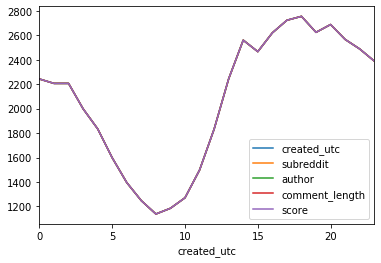

In [56]:
df.groupby(df.index.hour).count().plot()

### Exercise

See if you can figure out how to add lines for the day of the week to the above plot